In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 1. Exploratory Data Analysis (EDA):

In [6]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

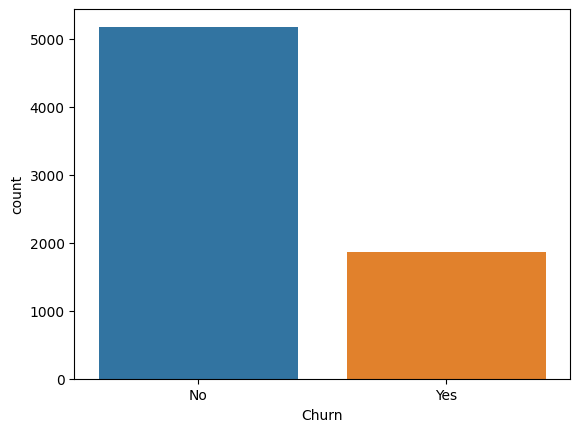

In [7]:
sns.countplot(data=df,x="Churn")
plt.show()

In [8]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

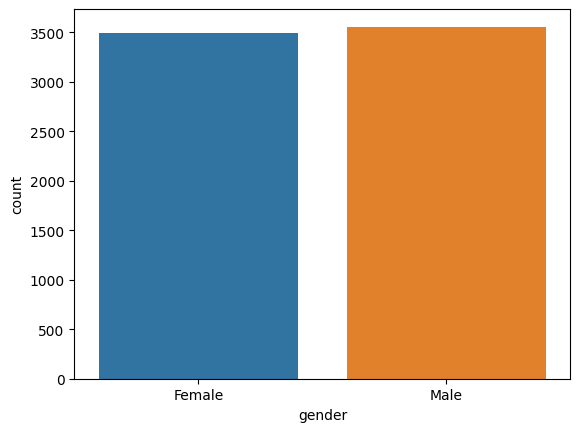

In [9]:

sns.countplot(data=df,x="gender")
plt.show()

In [10]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

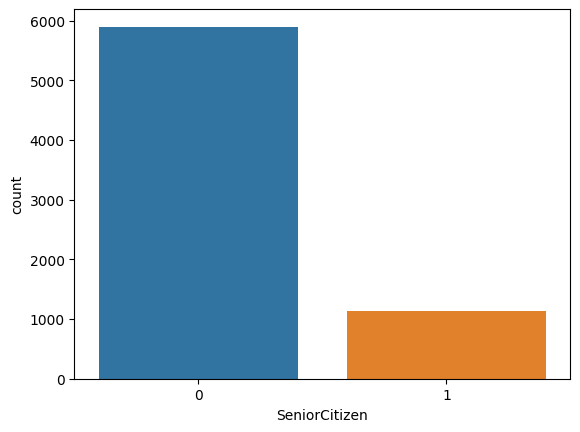

In [11]:
sns.countplot(data=df,x="SeniorCitizen")
plt.show()

In [12]:
df["Partner"].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

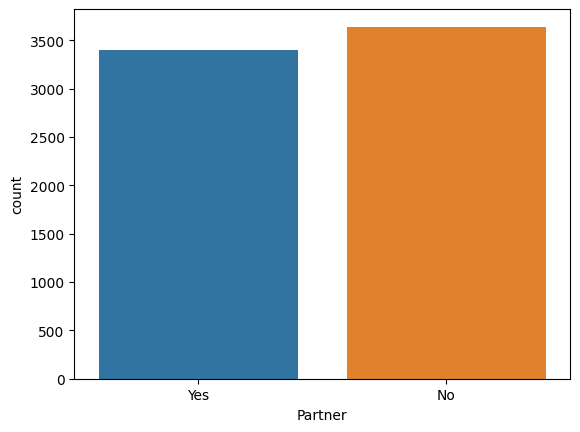

In [13]:
sns.countplot(data=df,x="Partner")
plt.show()

In [14]:
df["DeviceProtection"].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

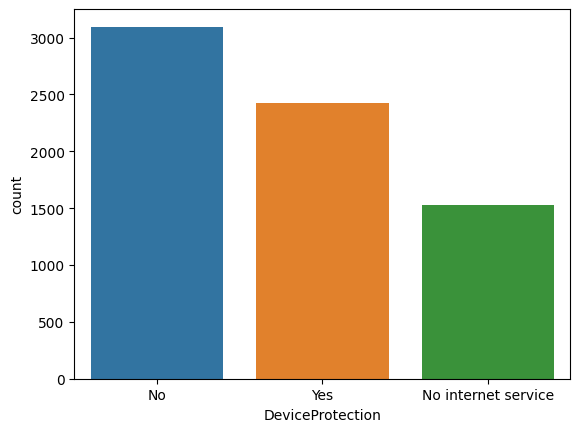

In [15]:
sns.countplot(data=df,x="DeviceProtection")
plt.show()

In [16]:
df["StreamingMovies"].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

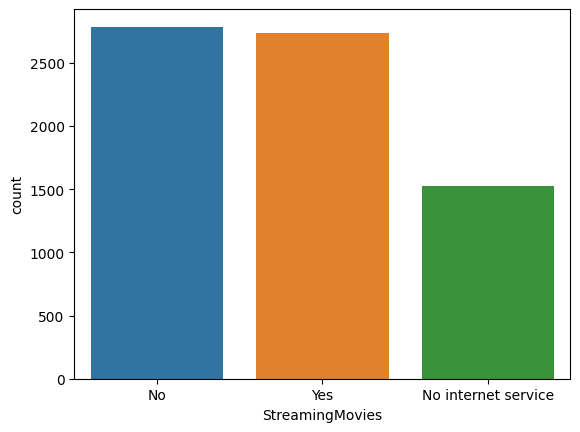

In [17]:
sns.countplot(data=df,x="StreamingMovies")
plt.show()

In [18]:
df["PaperlessBilling"].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

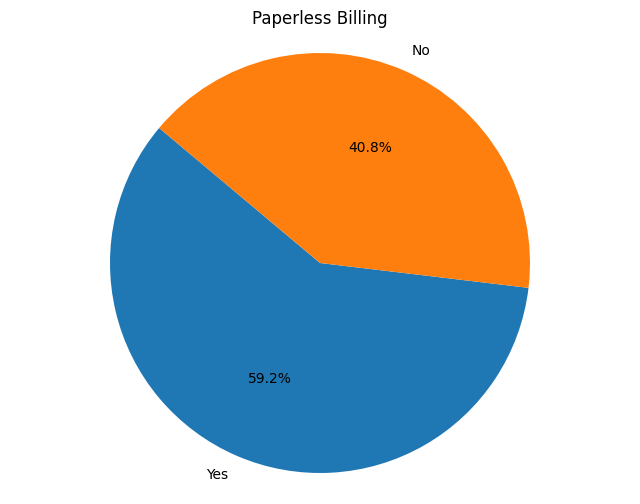

In [19]:
labels = df["PaperlessBilling"].value_counts().index
sizes = df["PaperlessBilling"].value_counts().values
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Paperless Billing')
plt.axis('equal') 
plt.show()

In [20]:
df["MultipleLines"].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

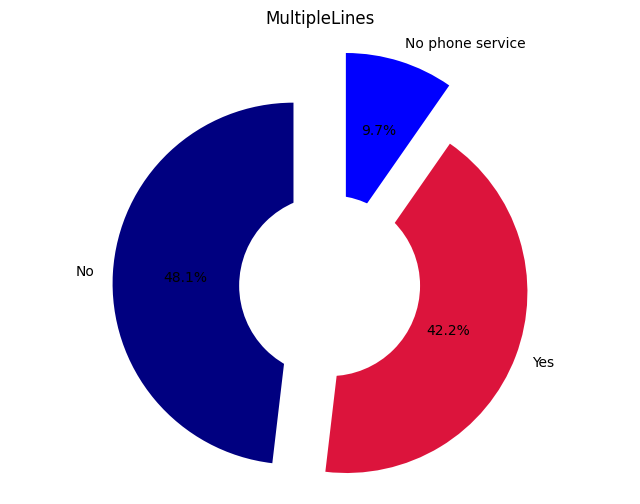

In [21]:


myexplode = [0.2, 0.1, 0.3]
labels = df["MultipleLines"].value_counts().index
sizes = df["MultipleLines"].value_counts().values
colors=["navy","crimson","blue"]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=myexplode,colors=colors)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('MultipleLines')
plt.axis('equal') 
plt.show()


In [22]:
df.drop(columns="customerID",axis=1,inplace=True)

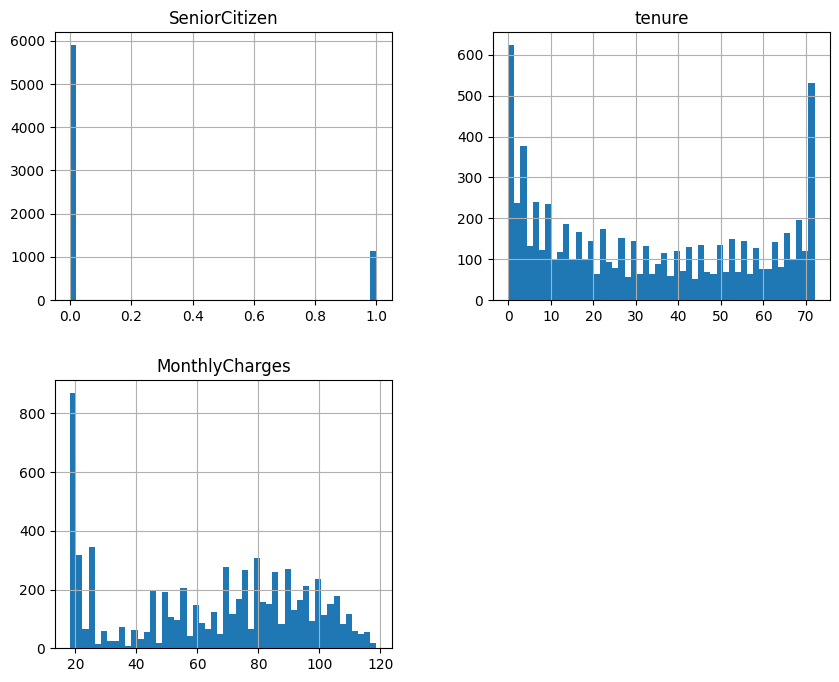

In [23]:
df.hist(bins=50,figsize=(10,8))
plt.show()

# 2. Feature Engineering:

In [24]:
df["OnlineSecurity"]=df["OnlineSecurity"].replace({"No internet service":"No"})
df["OnlineBackup"]=df["OnlineBackup"].replace({"No internet service":"No"})
df["DeviceProtection"]=df["DeviceProtection"].replace({"No internet service":"No"})
df["TechSupport"]=df["TechSupport"].replace({"No internet service":"No"})
df["StreamingTV"]=df["StreamingTV"].replace({"No internet service":"No"})
df["StreamingMovies"]=df["StreamingMovies"].replace({"No internet service":"No"})
df["MultipleLines"]=df["MultipleLines"].replace({"No phone service":"No"})

In [25]:
df['gender'] = df['gender'].replace({'Male':1,'Female':0})
df['Partner'] = df['Partner'].replace({'Yes':1,'No':0})
df['Dependents'] = df['Dependents'].replace({'Yes':1,'No':0})
df['PhoneService'] = df['PhoneService'].replace({'Yes':1,'No':0})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes':1,'No':0})
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes':1,'No':0})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes':1,'No':0})
df['TechSupport'] = df['TechSupport'].replace({'Yes':1,'No':0})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes':1,'No':0})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes':1,'No':0})
df['MultipleLines'] = df['MultipleLines'].replace({'Yes':1,'No':0})
df["InternetService"]=df["InternetService"].replace({"No":0,"Fiber optic":1,"DSL":2})
df["Contract"]=df["Contract"].replace({"One year":0,"Two year":1,"Month-to-month":2})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes':1,'No':0})
df['Churn'] = df['Churn'].replace({'Yes':1,'No':0})

/tmp/ipykernel_33/2586191320.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male':1,'Female':0})
/tmp/ipykernel_33/2586191320.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Partner'] = df['Partner'].replace({'Yes':1,'No':0})
/tmp/ipykernel_33/2586191320.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `p

In [26]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

df["PaymentMethod"]=l.fit_transform(df["PaymentMethod"])

In [27]:
import numpy as np
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)

# Convert the column to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df.dropna(subset=["TotalCharges"], inplace=True)

mean_total_charges = df["TotalCharges"].mean()
df["TotalCharges"].fillna(mean_total_charges, inplace=True)

/tmp/ipykernel_33/3961999560.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(mean_total_charges, inplace=True)


<Axes: >

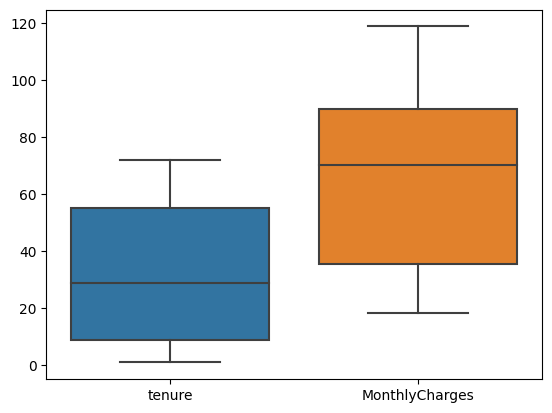

In [28]:
sns.boxplot(data=df[["tenure", "MonthlyCharges"]])

<Axes: >

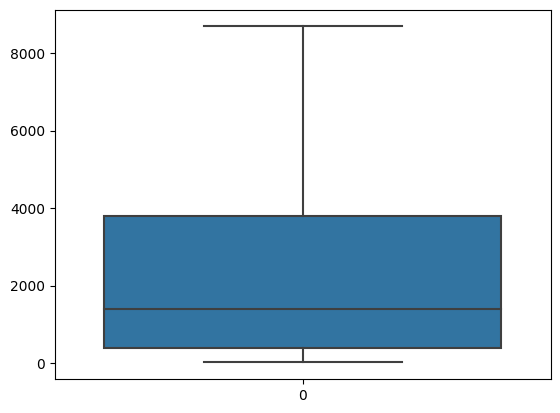

In [29]:
sns.boxplot(data=df["TotalCharges"])

# 3. Data Preprocessing:

In [30]:
col=["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[col]=scaler.fit_transform(df[col])

# 4. Machine Learning Model Development: 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


In [32]:
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
ada_boost = AdaBoostClassifier()

In [33]:
X=df.drop(columns="Churn",axis=1)
y=df["Churn"]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier()

In [36]:
logistic_regression_acc = accuracy_score(y_test, logistic_regression.predict(X_test))
decision_tree_acc = accuracy_score(y_test, decision_tree.predict(X_test))
random_forest_acc = accuracy_score(y_test, random_forest.predict(X_test))
gradient_boosting_acc = accuracy_score(y_test, gradient_boosting.predict(X_test))
ada_boost_acc = accuracy_score(y_test, ada_boost.predict(X_test))

print("Logistic Regression Accuracy:", logistic_regression_acc)
print("Decision Tree Accuracy:", decision_tree_acc)
print("Random Forest Accuracy:", random_forest_acc)
print("Gradient Boosting Accuracy:", gradient_boosting_acc)
print("AdaBoost Accuracy:", ada_boost_acc)

Logistic Regression Accuracy: 0.7846481876332623
Decision Tree Accuracy: 0.7178393745557925
Random Forest Accuracy: 0.7867803837953091
Gradient Boosting Accuracy: 0.7860696517412935
AdaBoost Accuracy: 0.783226723525231


In [37]:
pred0= logistic_regression.predict(X_test)
pred1= decision_tree.predict(X_test)
pred2= random_forest.predict(X_test)
pred3= gradient_boosting.predict(X_test)
pred4= ada_boost.predict(X_test)

# 5. Model Evaluation:

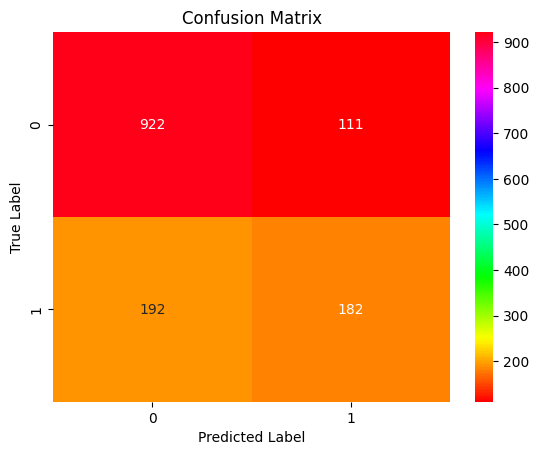

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

cf=confusion_matrix(y_test,pred0)
sns.heatmap(cf,annot=True,fmt="d",cmap="hsv")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

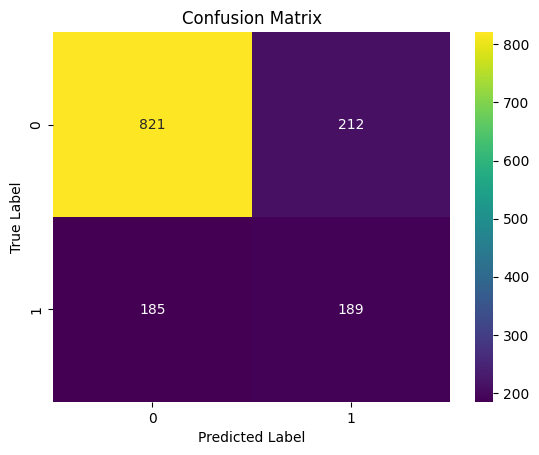

In [39]:

cf=confusion_matrix(y_test,pred1)
sns.heatmap(cf,annot=True,fmt="d",cmap="viridis")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

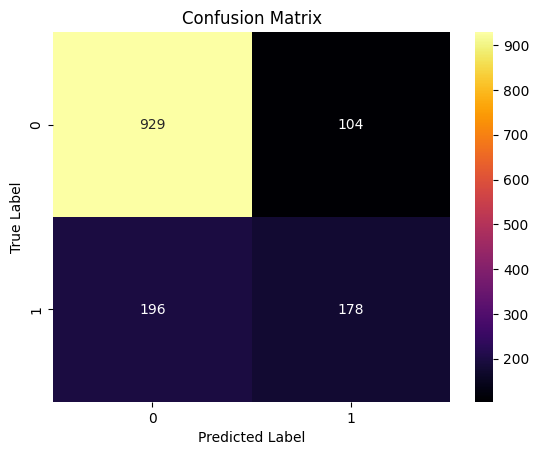

In [40]:
cf=confusion_matrix(y_test,pred2)
sns.heatmap(cf,annot=True,fmt="d",cmap="inferno")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

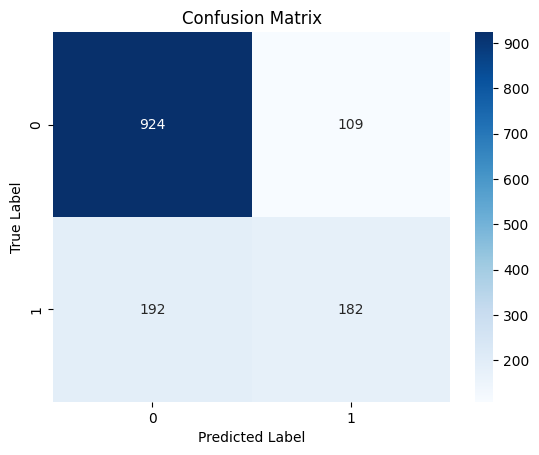

In [41]:
cf=confusion_matrix(y_test,pred3)
sns.heatmap(cf,annot=True,fmt="d",cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

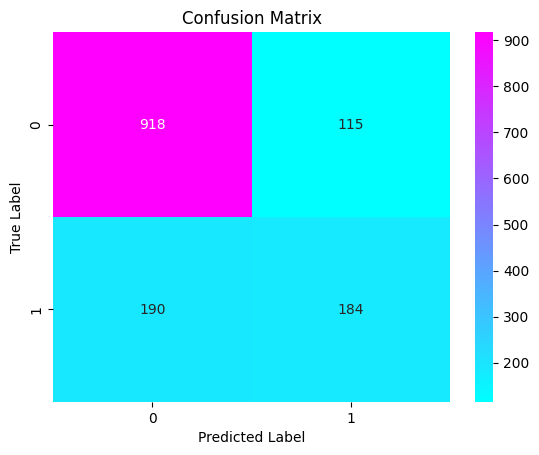

In [42]:
cf=confusion_matrix(y_test,pred4)
sns.heatmap(cf,annot=True,fmt="d",cmap="cool")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [43]:
print(classification_report(y_test,pred0))
print("============================================================")
print(classification_report(y_test,pred1))
print("============================================================")
print(classification_report(y_test,pred2))
print("============================================================")
print(classification_report(y_test,pred3))
print("============================================================")
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1033
           1       0.47      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

              preci

# Logistic Regression

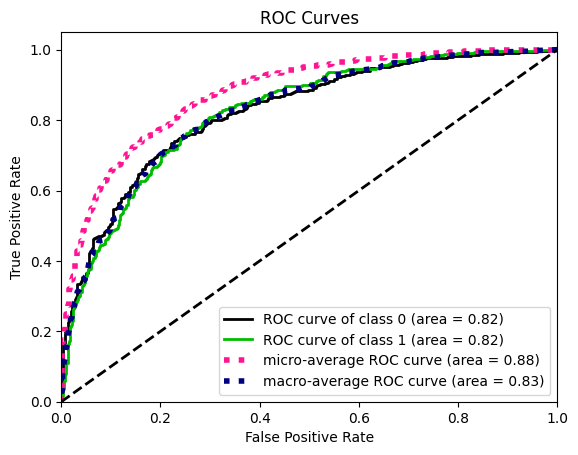

In [44]:
import scikitplot as skplt
y_probas =logistic_regression.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

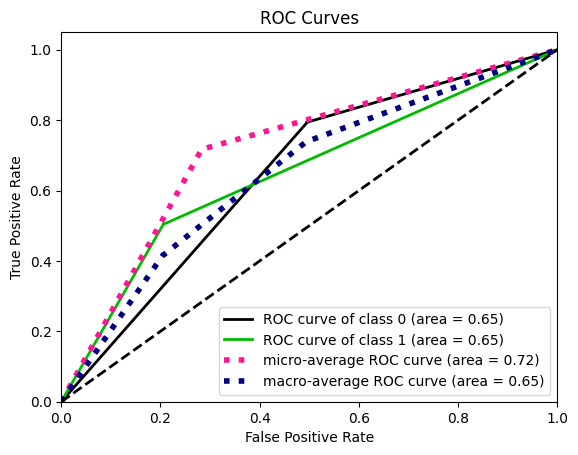

In [45]:
import scikitplot as skplt
y_probas =decision_tree.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

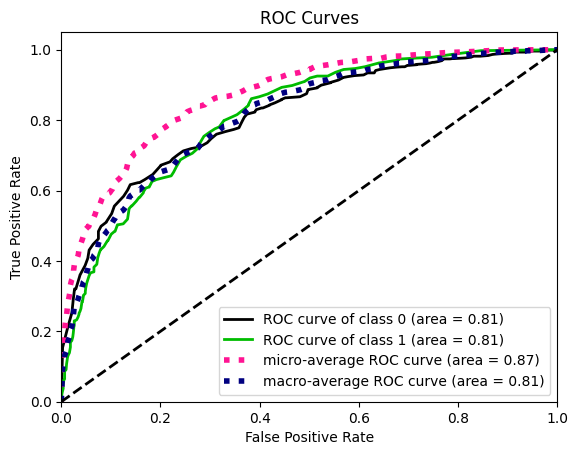

In [46]:
import scikitplot as skplt
y_probas =random_forest.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

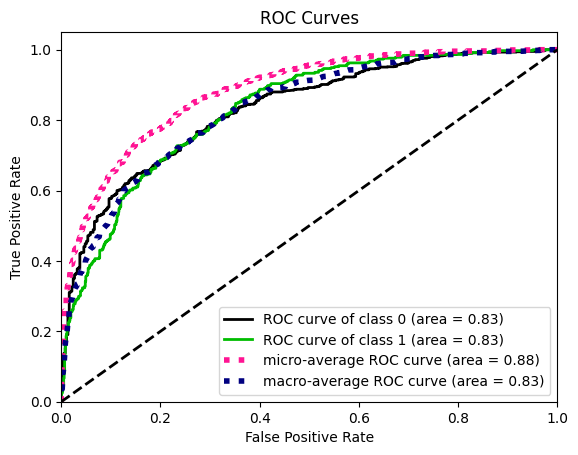

In [47]:
import scikitplot as skplt
y_probas =gradient_boosting.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

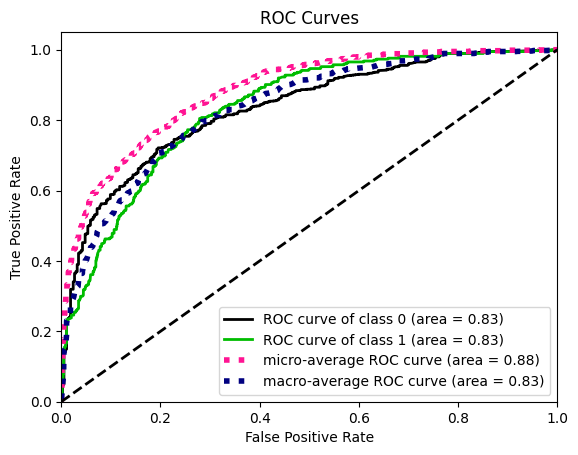

In [48]:
y_probas =ada_boost.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

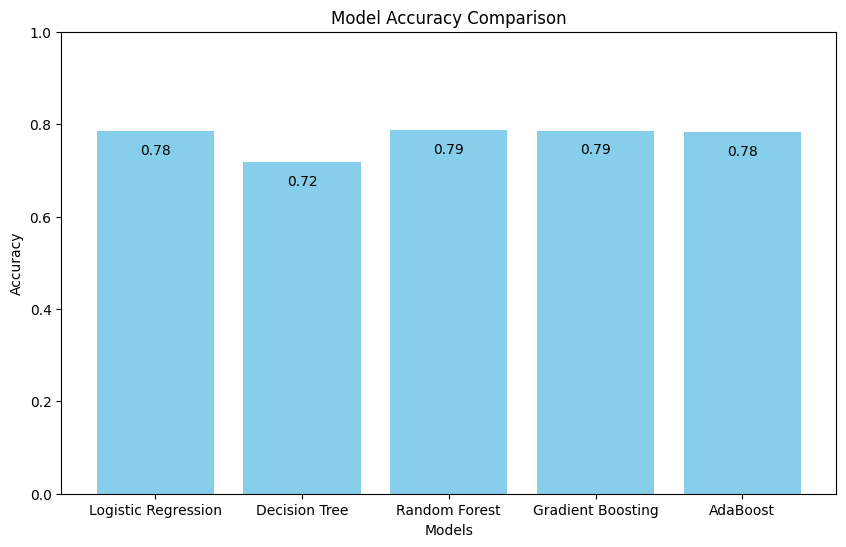

In [49]:

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost']
accuracies = [logistic_regression_acc, decision_tree_acc, random_forest_acc, gradient_boosting_acc, ada_boost_acc]
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')


for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, '{:.2f}'.format(accuracy), ha='center', color='black', fontsize=10)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  
plt.show()

# 6. Predicting Churn:

In [50]:
new_data = [[0, 0, 1, 0, -1.280248, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, -1.161694, -0.994194]]
prediction =  random_forest.predict(new_data)
print("Churn prediction:", prediction)

Churn prediction: [0]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 7. Recommendations:

### Focus on improving customer satisfaction: Identify pain points in the customer journey and address them promptly. Utilize customer feedback mechanisms like surveys or reviews to understand areas of improvement. Offer personalized support to address individual customer needs effectively.

### Promote Paperless Billing: Encourage customers to opt for paperless billing as it seems to be preferred by a significant portion of customers (4171 out of 7043). This can streamline the billing process, reduce administrative costs, and improve convenience for customers.

### Enhance streaming services: Since a considerable number of customers utilize streaming services like StreamingMovies and StreamingTV, consider investing in enhancing these offerings. Negotiate for better content deals, improve streaming quality, and introduce new features to make the streaming experience more appealing.

### Upsell Device Protection: There's a notable portion of customers without device protection (3095 out of 7043). Develop targeted marketing campaigns to promote the benefits of device protection services. Offer discounts or bundle deals to incentivize customers to opt for these services, thus providing added value and reducing the risk of churn.

### Strengthen Partner relationships: With almost an equal split between customers with and without partners, focus on catering to the needs of both segments. Develop strategies to provide incentives for referrals or exclusive offers for couples, thereby strengthening loyalty among this group.

### Target Senior Citizens: Since there's a significant number of non-senior citizens (5901 out of 7043), consider tailoring marketing efforts to attract more senior citizens. Identify services or features that are particularly appealing to this demographic and emphasize them in marketing campaigns.

### Address gender-based preferences: Analyze gender-based preferences to tailor marketing messages and service offerings more effectively. Understand the unique needs and preferences of male and female customers to provide personalized experiences that resonate with each group.

### Focus on retaining existing customers: While acquiring new customers is important, retaining existing ones is equally crucial. Implement loyalty programs, special discounts for long-term customers, or exclusive offers to incentivize customers to stay with your service.